In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

from scipy import stats

import seaborn as sns

plt.rcParams['font.family']=['Times New Roman']

In [5]:
#Read Data
file_address = '../Data/Merged_data/NassauCountyHPV.xlsx'

df_hpv_nassau = pd.read_excel(file_address)

file_address = '../Data/Merged_data/SuffolkCountyHPV.xlsx'

df_hpv_suffolk = pd.read_excel(file_address)

df_hpv = pd.concat([df_hpv_suffolk,df_hpv_nassau])

In [6]:
file_address = '../Data/Merged_data/distinct_hpv_patients.csv'

hpv_patients = pd.read_csv(file_address)


In [8]:
seasonal={'Spring':[3,4,5],
          'Summer':[6,7,8],
          'Fall':[9,10,11],
          'Winter':[12,1,2]}


In [9]:
group_ini = hpv_patients.groupby(['vax_month']).size().reset_index(name='count')
group_vax = df_hpv.groupby(['vax_month']).size().reset_index(name='count')

In [10]:
group_ini[group_ini['vax_month'].isin(mon)]

NameError: name 'mon' is not defined

In [11]:
hpv_ini_num,hpv_num=[],[]
for key in seasonal.keys():
    mon = seasonal[key]
    print(key,mon)
    hpv_ini_num.append(sum(np.array(group_ini[group_ini['vax_month'].isin(mon)]['count'])))
    hpv_num.append(sum(np.array(group_vax[group_ini['vax_month'].isin(mon)]['count'])))


Spring [3, 4, 5]
Summer [6, 7, 8]
Fall [9, 10, 11]
Winter [12, 1, 2]


In [12]:
diff = np.array(hpv_num)-np.array(hpv_ini_num)

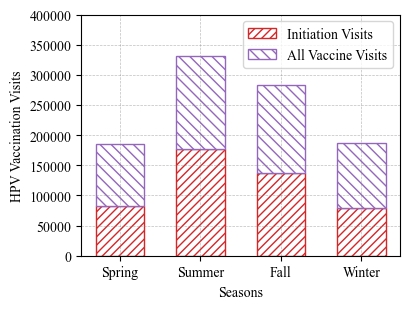

In [15]:
label = np.array(list(seasonal.keys()))
x=np.arange(len(label))

plt.figure(figsize=(4.2, 3.2))

#base1 is the complete rate
plt.bar(x,hpv_ini_num,color='w',edgecolor = 'C3',hatch='////',label = 'Initiation Visits',width = 0.6,bottom=0)
plt.bar(x,diff,color='w',edgecolor = 'C4',hatch='\\\\\\',label = 'All Vaccine Visits',width = 0.6,bottom=hpv_ini_num)

# for i in range(len(label)):
#     plt.text(i, base1[i]+base2[i]+0.02,str(round(portion[i],2))+str('%') , ha='center')
    

plt.xlabel('Seasons')

plt.ylabel('HPV Vaccination Visits')
# plt.title('Vaccine patient age distribution (Age 9-13)')
plt.ylim([0,400000])
plt.xticks(x, label)
plt.legend(loc='best')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureB/Seasonal.jpg')
plt.show()

## 9 to 13 kids preference

In [16]:
hpv_patients =hpv_patients[(hpv_patients['PatientAge']<=13) &(hpv_patients['PatientAge']>=9)]
df_hpv =df_hpv[(df_hpv['PatientAge']<=13) &(df_hpv['PatientAge']>=9)]

In [17]:

group_ini = hpv_patients.groupby(['vax_month']).size().reset_index(name='count')
group_vax = df_hpv.groupby(['vax_month']).size().reset_index(name='count')

In [18]:
hpv_ini_num,hpv_num=[],[]
for key in seasonal.keys():
    mon = seasonal[key]
    print(key,mon)
    hpv_ini_num.append(sum(np.array(group_ini[group_ini['vax_month'].isin(mon)]['count'])))
    hpv_num.append(sum(np.array(group_vax[group_ini['vax_month'].isin(mon)]['count'])))
diff = np.array(hpv_num)-np.array(hpv_ini_num)

Spring [3, 4, 5]
Summer [6, 7, 8]
Fall [9, 10, 11]
Winter [12, 1, 2]


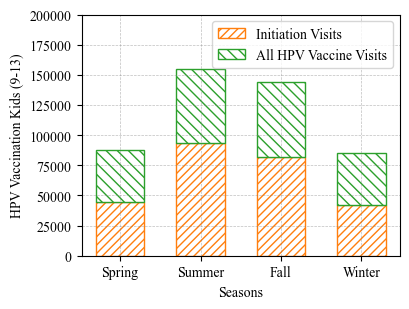

In [19]:
label = np.array(list(seasonal.keys()))
x=np.arange(len(label))

plt.figure(figsize=(4.2, 3.2))

#base1 is the complete rate
plt.bar(x,hpv_ini_num,color='w',edgecolor = 'C1',hatch='////',label = 'Initiation Visits',width = 0.6,bottom=0)
plt.bar(x,diff,color='w',edgecolor = 'C2',hatch='\\\\\\',label = 'All HPV Vaccine Visits',width = 0.6,bottom=hpv_ini_num)

# for i in range(len(label)):
#     plt.text(i, base1[i]+base2[i]+0.02,str(round(portion[i],2))+str('%') , ha='center')
    

plt.xlabel('Seasons')
plt.ylabel('HPV Vaccination Kids (9-13)')
# plt.title('Vaccine patient age distribution (Age 9-13)')
plt.ylim([0,200000])
plt.xticks(x, label)
plt.legend(loc='best')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureB/Seasonal913.jpg')
plt.show()